# Deutsch Algorithm

Two main properties of quantum used in Deutsch's algorithm:

- **Quantum Parallelism:** It allows quantum computers to evaluate a function $f(x)$ for many different values of $x$ ***simultaneously***.
- **Interference:** It allows for qubit states to interfere constructively or destructively (just like waves).

#### <font color='red'> **Problem Statement:** </font> Given a boolean-function $f:\{0,1\} \rightarrow \{0, 1\}$ as an oracle, the goal is to decide whether $f$ is constant or balanced.

#### Explaining the terms involved:

- **Oracle:** When we say a function is given as an *oracle*, it means that we can evaluate it for an input by making queries and we'll get the corresponding output, but we are not allowed to look at the function itself.
- **Constant Function:** A function $f(x)$ is constant, if the output is the same (either $0$ or $1$) for all possible inputs $x$.
- **Balanced Function:** A function $f(x)$ is balanced, if it evaluates to $1$ for exactly half of the possible inputs ($x$) and to $0$ for the other half.


#### <font color='red'> **Exercise:** *Classical Complexity-* Clasically, how many oracle calls you need to make (in the worst case) to decide this problem? </font>

#### **Algorithm:** 

We construct a 2 qubit quantum circuit.

- Set the second qubit to state $\ket{-}$ by applying $X$ and $H$ gates.

- Apply $H$ to first qubit.

- Apply $U_f$. (*the oracle*: required to be given to the algorithm)

- Apply $H$ to first qubit.

- Measure the first qubit. If it is 0 then $f$ is constant. If it is 1, then $f$ is balanced.


![DeutschCircuit](Images/DeutschCircuit.png)

### Theoretical Analysis of the circuit

We start with the initial state $\ket{0}\ket{0}$. Next we apply an $X$ gate to the second qubit and obtain the state $\ket{\psi_0} = \ket{0}\ket{1}.$

- After applying $H$ to both qubits, the first qubit is in the equal superposition state and the second qubit is now in state $\ket{-}$. Therefore we have, 

\begin{align*}
\ket{\psi_1} &=
&\left(\frac{1}{\sqrt{2}}\ket{0} +\frac{1}{\sqrt{2}}\ket{1}\right)\ket{-} \\
\hspace{-2in}\\
\end{align*}


- Next we apply $U_f$ to $\ket{\psi_1}$ and obtain $\ket{\psi_2}$

\begin{align*}
\\\ket{\psi_2} &= U_f\left(\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1}\right)\ket{-} \\
\end{align*}

<font color='red'> **Exercise: (Phase Kickback)**</font> Using the definition of $U_f$ we used in $PS(04)$, that is $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)}$ show that $\ket{\psi_2}$ simplifies to 

$$ \ket{\psi_2}= \left(\frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}+\frac{1}{\sqrt{2}}(-1)^{f(1)}\ket{1}\right)\ket{-} $$  




- Next we apply Hadamard to the first qubit, we get the below state  (<font color='red'>Check!!</font>)

$$ \ket{\psi_3} = \left(\frac{(-1)^{f(0)} + (-1)^{f(1)}}{2}\right) \ket{0} \ket{-}+ \left(\frac{(-1)^{f(0)} - (-1)^{f(1)}}{2}\right)\ket{1} \ket{-}$$



- There are only two possibilities for the state $\ket{\psi_3}$ depending on whether $f$ is balanced or $f$ is constant. 

If $f$ is constant, then $f(0)=f(1)$ which implies (<font color='red'> Please work this out </font>) $$\ket{\psi_3}= \pm \ket{0} \left(\frac{\ket{0}-\ket{1}}{\sqrt{2}}\right)$$

If $f$ is balanced, then $f(0)\ne f(1)$ which implies (<font color='red'> Please work this out</font> ) $$\ket{\psi_3}= \pm \ket{1} \left(\frac{\ket{0}-\ket{1}}{\sqrt{2}}\right)$$

Noticing that $f(0) \oplus f(1)$ is $0$ if $f$ is constant and is $1$ if $f$ is balanced, both of the results can be concisely written as

$$\ket{\psi_3}= \pm \ket{f(0) \oplus f(1)} \ket{-}$$



- Meauring the first qubit we can determine $f(0) \oplus f(1)$ and thus by only a single evaluation (with $100 \% $ certainty) we would be able to decide the nature of $f$.

### Creating an oracle:

There are four possible functions $f(x)$. Identity and NOT (Balanced), Constant $1$ and Constant $2$ (Constant)

<font color='red'> **Exercise: Construct the `oracle()` function by completing the codes below which implements each of the above function.**</font>

In other words, construct a circuit implementing $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $. Two oracles are implemented for you, you need to construct the other two.

Note that qubit $0$ is the input and qubit $1$ is the output qubit.


In [5]:
import qiskit
from qiskit import *

# Constant function oracles

# f(0)=f(1)=1
def Const_oracle1():
    oracle_circuit = QuantumCircuit(2)
    oracle_circuit.x(1)   # the output remains the same, that is 1, irrespective of input
    return oracle_circuit

 # f(0)=f(1)= 0
def Const_oracle2():
    oracle_circuit = QuantumCircuit(2)
    
    return oracle_circuit

# Balanced function oracles

#Identity function, f(0)= 0; f(1)=1
def Id_oracle(): 
    oracle_circuit = QuantumCircuit(2)
    oracle_circuit.cx(0,1)
    return oracle_circuit

#Not function, f(0)=1 and f(1)=0
def NOT_oracle():
    oracle_circuit = QuantumCircuit(2)
    oracle_circuit.x(1)
    oracle_circuit.cx(0,1)
    return oracle_circuit

### Implementing Deutsch Algorithm:

Any of the four oracles above can be given to you and you don't know which one. Deutsch Algorithm can be used to evaluate whether the oracle is balanced function or a constant function. 

In [6]:
#Chosing a random oracle
import random
# Create the list of oracles
oracle_list = [Const_oracle1, Const_oracle2, Id_oracle, NOT_oracle]

# Randomly select an index using randrange(4)
random_index = random.randrange(4)

print(random_index)

# Call the selected oracle
selected_oracle = oracle_list[random_index]
selected_oracle()

1


NameError: name 'QuantumCircuit' is not defined

You can use circuit += oracle() to add the oracle to the whole circuit. In general, you can define functions returning circuits and append them to your circuit by +=.

C:\Users\viraj.dsouza\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


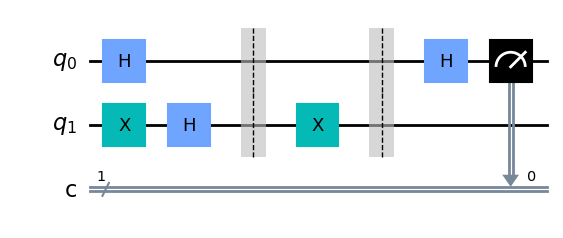

In [3]:
# Implementing the Algorithm given the selected_oracle()

from qiskit import QuantumCircuit, execute, Aer

DeutschCircuit= QuantumCircuit(2,1)

# Apply X and H to qubit 1
DeutschCircuit.x(1)
DeutschCircuit.h(1)

# Apply H to qubit 0
DeutschCircuit.h(0)

DeutschCircuit.barrier()

# Apply oracle 
DeutschCircuit.compose(selected_oracle(), inplace=True)

DeutschCircuit.barrier()

# Apply H to qubit 0
DeutschCircuit.h(0)

# Measure qubit 0
DeutschCircuit.measure(0, 0)

DeutschCircuit.draw(output='mpl')

In [4]:
job = execute(DeutschCircuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'0': 10000}


If the measurement result is $1$ $f$ is balanced, else $f$ is constant. Thus, Deutsch's algorithm proves that you can solve the problem by making only $1$ query, without making any errors. This is one of the first results where we gain advantage using quantum computing but yet it is not a great enough speedup. Next, we will see some algorithms where the speedup is much better.

# Deutsch-Jozsa Algorithm

##### We generalize our function $f:\{0,1\}^n \rightarrow \{0,1\}$, which means that our function $f$ takes as input an $n$-bit string $x$ and maps it to $0$ or $1$. In this case, we say that $f$ is constant if it maps every string of length $n$ to either 0 or 1, and it is balanced if it maps exactly half of the bit strings to $0$ and the other half to $1$.

#### <font color='red'> **Problem Statement:** </font> Given a boolean-function $f:\{0,1\}^n \rightarrow \{0, 1\}$ as an oracle, the goal is to decide whether $f$ is constant or balanced.

#### <font color='red'> **Exercise:** *Classical Complexity-* Clasically, how many oracle calls you need to make (in the worst case) to decide this problem? </font>

#### Note: 
- The input size being $n$ instead of $1$, does not make any change while implementing  $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $. When the input is $n$ bits, $\ket{x} = \ket{ x_1x_2x_3...x_n}$ is a quantum state with $n$ qubits and $y$ is the single output qubit since the range of $f$ is $\{0,1\}$.

- Also, the phase kickback idea still applies:    $ \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $
- The notation $\ket{x}$ can be used for $x \in \mathbb{N}$, as the binary representation of the number. For example $\ket{42}$ is $\ket{101010}$ in a $6$ qubit register or $\ket{0000101010}$ in a $10$ qubit register. While writing $\ket{x}$ the length of the register is often left implicit.

### Useful Results to know:

- Let $x \in \{0,1\}$. The following expression can be shown to be true:

$$ H\ket{x} = \frac{1}{\sqrt{2}} \left( \ket{0} + (-1)^{x} \ket{1} \right) = \frac{1}{\sqrt{2}}\sum_{z\in\{0,1\}}(-1)^{xz}\ket{z} $$

When $x=0$, then we have a plus and when $x=1$, we have a minus sign in front of $\ket{1}$ in the uniform superposition as expected from the   action of Hadamard on $\ket{0}$ and $\ket{1}$.

- For an arbitrary $n-$ qubit state $\ket{x}$, the following expression holds:

$$  H^{\otimes n} \ket{x} = \left(\frac{1}{\sqrt{2}}\sum_{z_1\in\{0,1\}}(-1)^{x_1z_1}\ket{z_1}\right) \otimes \left(\frac{1}{\sqrt{2}}\sum_{z_2\in\{0,1\}}(-1)^{x_2z_2}\ket{z_2} \right) \otimes \cdots \otimes \left(\frac{1}{\sqrt{2}}\sum_{z_n\in\{0,1\}}(-1)^{x_nz_n}\ket{z_n}\right) $$

which implies, 

$$ H^{\otimes n} \ket{x} =\frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1}(-1)^{x \cdot z}\ket{z}$$


where $\ket{x}=\ket{x_1\cdots x_n}$, $\ket{z}=\ket{z_1\cdots z_n}$ and $ x \cdot z = \sum_{i=1}^n x_i \cdot z_i \pmod 2 $

<font color='red'> **Exercise:** </font> Calculate $H^{\otimes 5} \ket{31}$. Then simulate this using a quantum circuit with a $5$ qubit quantum register and observe the measurement results.